<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/a)_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Describe the numerical features
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Drop 'Id' and 'Species' columns
X = df.drop(columns=['Id', 'Species'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


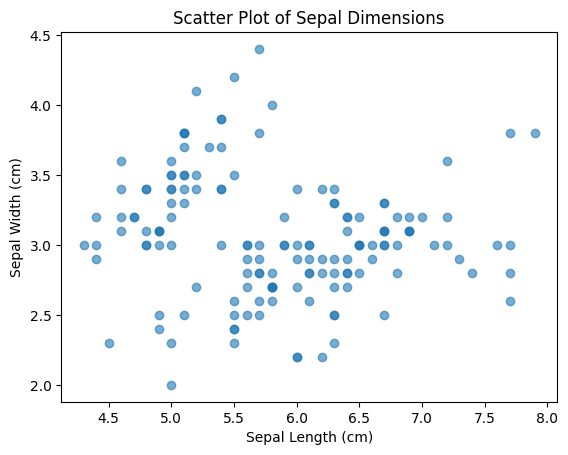

In [7]:
# Scatter plot for SepalLengthCm and SepalWidthCm
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], alpha=0.6)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Dimensions')
plt.show()


In [17]:
class KMeansScratchWithPlots:
    def __init__(self, k=3, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        # Randomly initialize centroids
        random_indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_indices]

        for iteration in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Plot the current state of clustering
            self._plot_clusters(X, iteration)

            # Update centroids
            new_centroids = self._update_centroids(X)

            # Check convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                print(f"Converged in {iteration} iterations.")
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

    def _plot_clusters(self, X, iteration):
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, cmap='viridis', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=200, c='red', marker='X')
        plt.title(f"K-Means Iteration {iteration}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

    def predict(self, X):
        return self._assign_clusters(X)


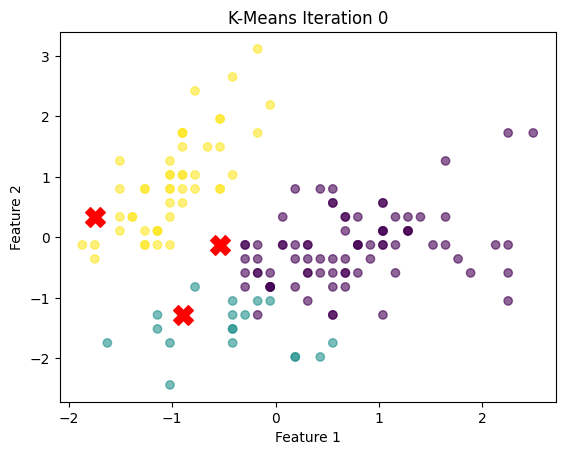

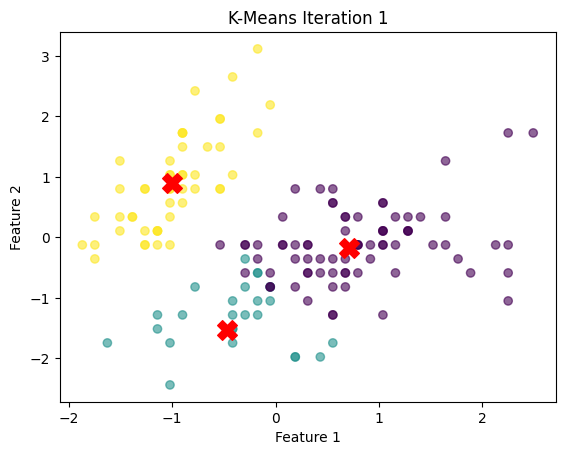

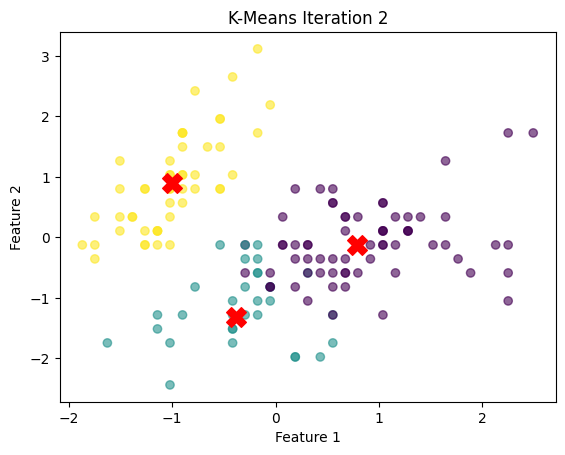

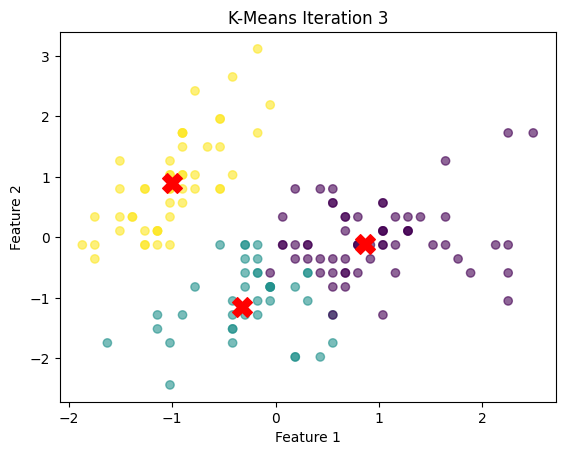

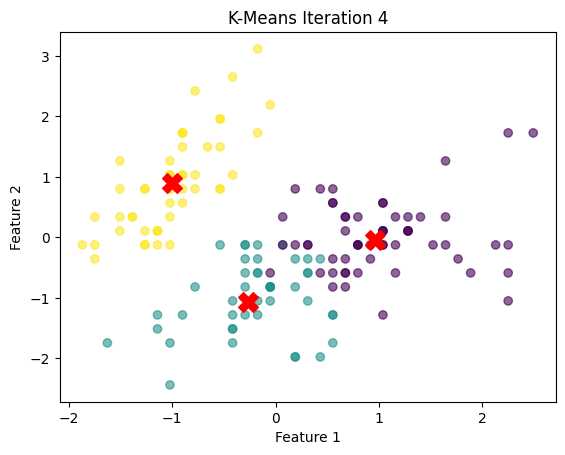

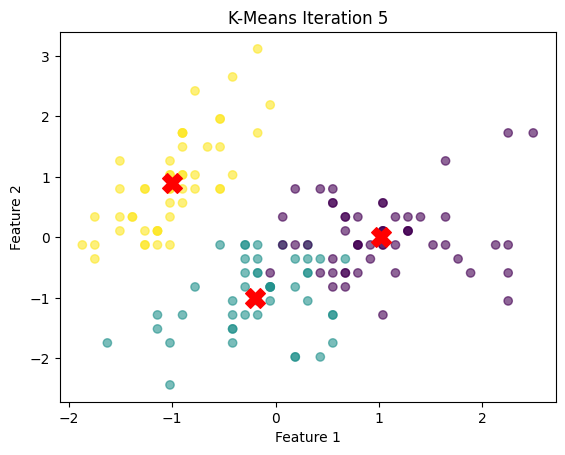

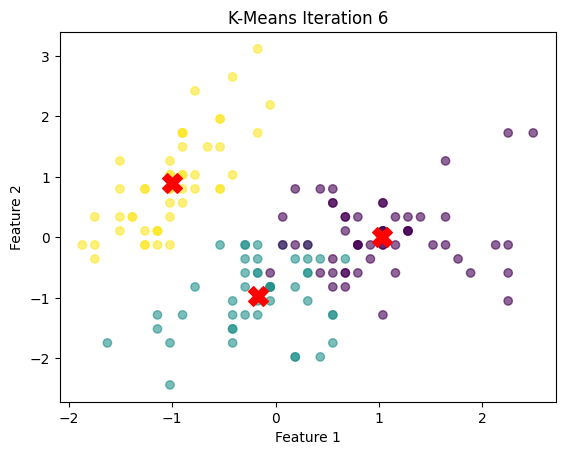

Converged in 6 iterations.


In [18]:
# Apply the updated KMeans clustering
kmeans_with_plots = KMeansScratchWithPlots(k=3)
kmeans_with_plots.fit(X_scaled)
